<a href="https://colab.research.google.com/github/DeniseBarbosa/Projeto-Case-Empresas-Unicornios/blob/main/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#ler os dados
Base_Dados = pd.read_csv('/content/Startups+in+2021+end.csv')

#Verificar a dimensão
Base_Dados.shape

(936, 8)

In [6]:
#936 linhas e 8 colunas 

#Verificando os primeiros registros 

Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [7]:
#Verificando as colunas existentes 
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [8]:
#Renomear as colunas 
Base_Dados.rename(columns={
    'Unnamed: 0':'Id',
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined':'Data de Adesão',
    'Country': 'País',
    'City': 'Cidade', 
    'Industry': 'Setor',
    'Select Investors': 'Investidores',

}, inplace=True)

In [9]:
#Verificar o tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [10]:
#Verificar campos nulos
Base_Dados.isnull()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
931,False,False,False,False,False,False,False,False
932,False,False,False,False,False,False,False,False
933,False,False,False,False,False,False,False,False
934,False,False,False,False,False,False,False,False


In [11]:
#Verificar campos nulos
Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

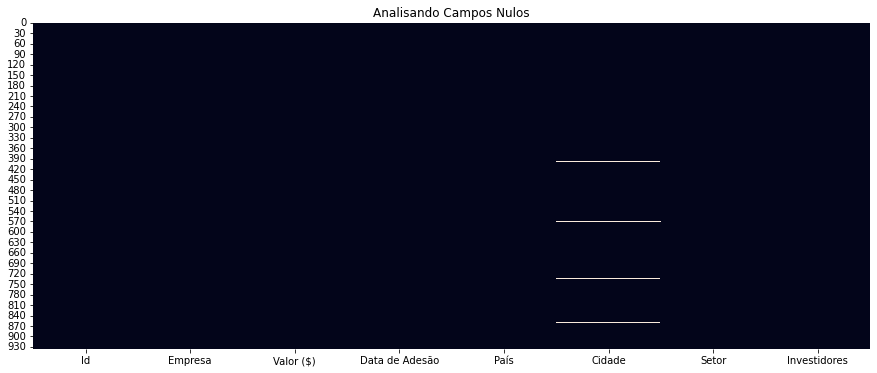

In [15]:
#Fazer uma visão gráfica use tambem o ; para anular a mensagem que aparece em cima
plt.figure(figsize=(15,6)) #alterando largura e altura
plt.title('Analisando Campos Nulos') #Colocando um título
sns.heatmap(Base_Dados.isnull(), cbar=False); # cbar=False retira a barra de escala,